In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import itertools
# import NOTEARS
import nt_linear as nt
from dag_generator import DAGGenerator
from sklearn.preprocessing import scale
import scipy
from scipy.stats import entropy
from matplotlib import animation
import seaborn as sns
import matplotlib as mpl

In [2]:
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.linewidth'] = 2

# Attacks
This notebook contains all possible attacks on 3-node variable systems using varsortability. 

## ToC
1. Chains
    - Revert Chain
    - Introduce Fork
    - Introduce Collider
2. Forks
    - Convert Fork to Chain
    - Change Fork's origin
    - Introduce Collider
3. Colliders
    - Convert Collider into Fork
    - Convert Collider into Chain
    - Change Collider's sink node

In [3]:
SAMPLE_SIZE = 100000
NODE_SIZE = 2000
ARROW_SIZE = 20
LINEWIDTH = 1

## 1. Chains

### Revert Chain

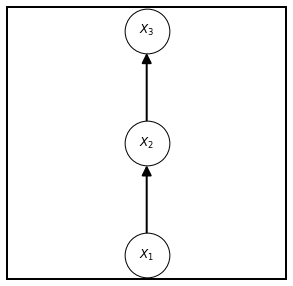

In [4]:
adj = np.array([[0, 1, 0],
                [0, 0, 1], 
                [0, 0, 0]])
G = nx.convert_matrix.from_numpy_array(adj, create_using=nx.DiGraph)
fig = plt.figure(figsize=(5, 5))
labels = {node: fr"$X_{node + 1}$" for node in G.nodes}
pos = {node: (1, node) for node in G.nodes}
nx.draw_networkx(G, pos=pos, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels)

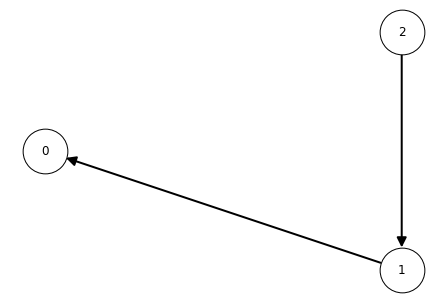

In [5]:
X_0 = np.random.normal(0, 1, SAMPLE_SIZE)
X1 = X_0 + np.random.normal(0, 1, SAMPLE_SIZE)
X2 = X1 + np.random.normal(0, 1, SAMPLE_SIZE)
gdata = np.array([X_0, X1, X2]).T

gdata = scale(gdata)

gdata[:, 0] *= 3
gdata[:, 1] *= 2

nt_pred = nt.notears_linear(gdata, 0.05, 'l2')
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred, create_using=nx.DiGraph)
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black')

### Create Fork

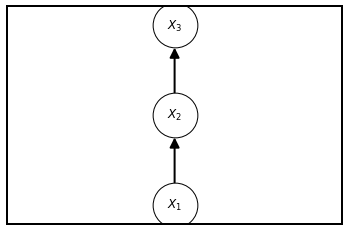

In [6]:
adj = np.array([[0, 1, 0],
                [0, 0, 1], 
                [0, 0, 0]])
G = nx.convert_matrix.from_numpy_array(adj, create_using=nx.DiGraph)
labels = {node: fr"$X_{node + 1}$" for node in G.nodes}
pos = {node: (1, node) for node in G.nodes}
nx.draw_networkx(G, pos=pos, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels)

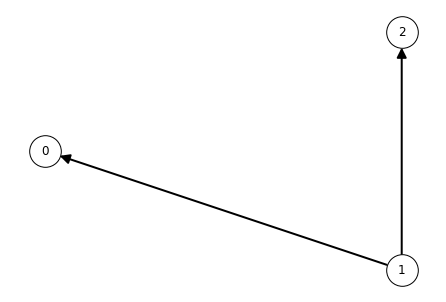

In [28]:
X_0 = np.random.normal(0, 1, SAMPLE_SIZE)
X1 = X_0 + np.random.normal(0, 1, SAMPLE_SIZE)
X2 = X1 + np.random.normal(0, 1, SAMPLE_SIZE)
gdata = np.array([X_0, X1, X2]).T
gdata = scale(gdata)

gdata[:, 2] *= 2
gdata[:, 0] *= 2

nt_pred = nt.notears_linear(gdata, 0.05, 'l2')
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred, create_using=nx.DiGraph)
labels = {node: fr"$X_{node + 1}$" for node in G.nodes}
pos = {node: (1, node) for node in G.nodes}
nx.draw_networkx(G, pos=pos, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels)

### Creating Collider

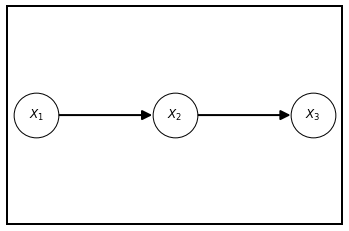

In [7]:
adj = np.array([[0, 1, 0],
                [0, 0, 1], 
                [0, 0, 0]])
G = nx.convert_matrix.from_numpy_array(adj, create_using=nx.DiGraph)
labels = {node: fr"$X_{node + 1}$" for node in G.nodes}
pos = {node: (node, 1) for node in G.nodes}
nx.draw_networkx(G, pos=pos, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels)

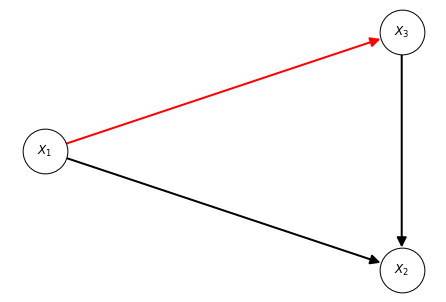

In [13]:
X_0 = np.random.normal(0, 1, SAMPLE_SIZE)
X1 = X_0 + np.random.normal(0, 1, SAMPLE_SIZE)
X2 = X1 + np.random.normal(0, 1, SAMPLE_SIZE)
gdata = np.array([X_0, X1, X2]).T
gdata = scale(gdata)

gdata[:, 1] *= 2

nt_pred = nt.notears_linear(gdata, 0.05, 'l2')
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred, create_using=nx.DiGraph)
labels = {node: fr"$X_{node + 1}$" for node in G.nodes}
edge_colors = ['black' if edge != (0, 2) else 'red' for edge in nt_pred_nx.edges]
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black', labels=labels, edge_color=edge_colors)

## 2. Forks

### Fork2Chain

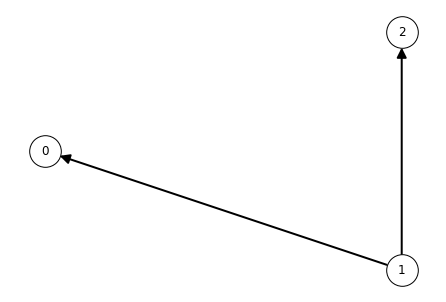

In [31]:
adj = np.array([[0, 0, 0],
                [1, 0, 1], 
                [0, 0, 0]])
G = nx.convert_matrix.from_numpy_array(adj, create_using=nx.DiGraph)
nx.draw_shell(G, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black')

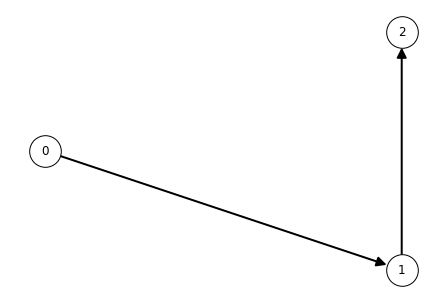

In [32]:
X1 = np.random.normal(0, 1, SAMPLE_SIZE)
X0 = X1 + np.random.normal(0, 1, SAMPLE_SIZE)
X2 = X1 + np.random.normal(0, 1, SAMPLE_SIZE)
gdata = np.array([X0, X1, X2]).T
gdata = scale(gdata)

gdata[:, 2] *= 3
gdata[:, 1] *= 2

nt_pred = nt.notears_linear(gdata, 0.05, 'l2')
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred, create_using=nx.DiGraph)
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black')

### Change Fork origin

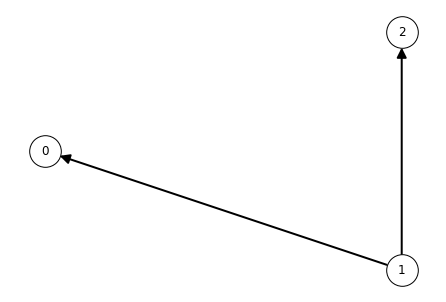

In [33]:
adj = np.array([[0, 0, 0],
                [1, 0, 1], 
                [0, 0, 0]])
G = nx.convert_matrix.from_numpy_array(adj, create_using=nx.DiGraph)
nx.draw_shell(G, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black')

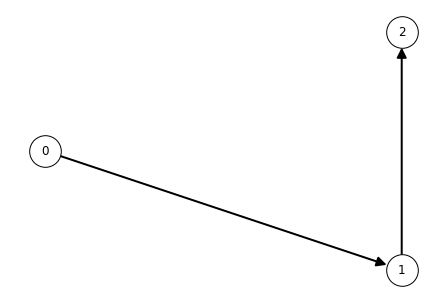

In [34]:
X1 = np.random.normal(0, 1, SAMPLE_SIZE)
X0 = X1 + np.random.normal(0, 1, SAMPLE_SIZE)
X2 = X1 + np.random.normal(0, 1, SAMPLE_SIZE)
gdata = np.array([X0, X1, X2]).T
gdata = scale(gdata)

gdata[:, 1] *= 2
gdata[:, 2] *= 2

nt_pred = nt.notears_linear(gdata, 0.05, 'l2')
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred, create_using=nx.DiGraph)
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black')

### Fork2Collider

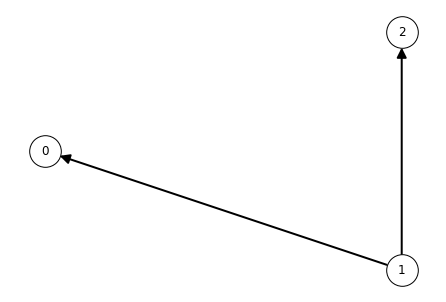

In [35]:
adj = np.array([[0, 0, 0],
                [1, 0, 1], 
                [0, 0, 0]])
G = nx.convert_matrix.from_numpy_array(adj, create_using=nx.DiGraph)
nx.draw_shell(G, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black')

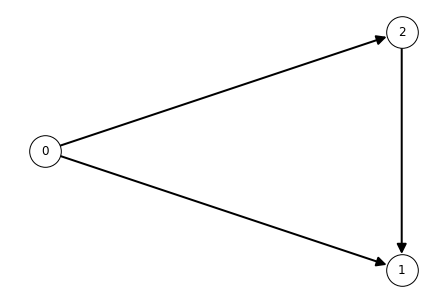

In [36]:
X1 = np.random.normal(0, 1, SAMPLE_SIZE)
X0 = X1 + np.random.normal(0, 1, SAMPLE_SIZE)
X2 = X1 + np.random.normal(0, 1, SAMPLE_SIZE)
gdata = np.array([X0, X1, X2]).T
gdata = scale(gdata)

gdata[:, 1] *= 2

nt_pred = nt.notears_linear(gdata, 0.05, 'l2')
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred, create_using=nx.DiGraph)
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black')

## Colliders

### Collider2Chain

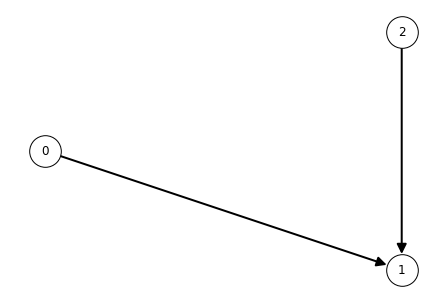

In [3]:
adj = np.array([[0, 1, 0],
                [0, 0, 0], 
                [0, 1, 0]])
G = nx.convert_matrix.from_numpy_array(adj, create_using=nx.DiGraph)
nx.draw_shell(G, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black')

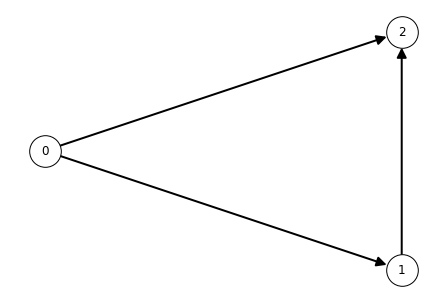

In [7]:
X0 = np.random.normal(0, 1, SAMPLE_SIZE)
X2 = np.random.normal(0, 1, SAMPLE_SIZE)
X1 = X0 + X2 + np.random.normal(0, 1, SAMPLE_SIZE)
gdata = np.array([X0, X1, X2]).T
gdata = scale(gdata)

gdata[:, 2] *= 3
gdata[:, 1] *= 2

nt_pred = nt.notears_linear(gdata, 0.05, 'l2')
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred, create_using=nx.DiGraph)
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black')

### Collider2Fork

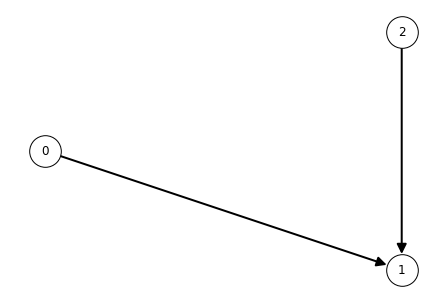

In [39]:
adj = np.array([[0, 1, 0],
                [0, 0, 0], 
                [0, 1, 0]])
G = nx.convert_matrix.from_numpy_array(adj, create_using=nx.DiGraph)
nx.draw_shell(G, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black')

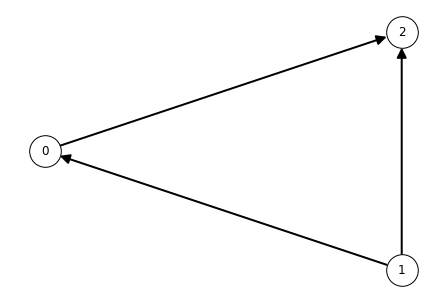

In [40]:
X0 = np.random.normal(0, 1, SAMPLE_SIZE)
X2 = np.random.normal(0, 1, SAMPLE_SIZE)
X1 = X0 + X2 + np.random.normal(0, 1, SAMPLE_SIZE)
gdata = np.array([X0, X1, X2]).T
gdata = scale(gdata)

gdata[:, 2] *= 2
gdata[:, 0] *= 2

nt_pred = nt.notears_linear(gdata, 0.05, 'l2')
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred, create_using=nx.DiGraph)
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black')

### Change Collider sink node

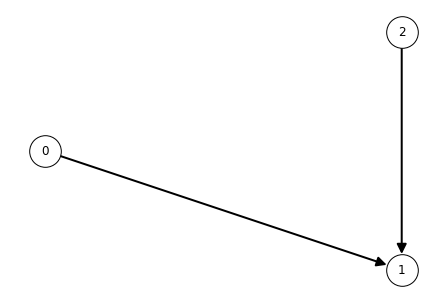

In [41]:
adj = np.array([[0, 1, 0],
                [0, 0, 0], 
                [0, 1, 0]])
G = nx.convert_matrix.from_numpy_array(adj, create_using=nx.DiGraph)
nx.draw_shell(G, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black')

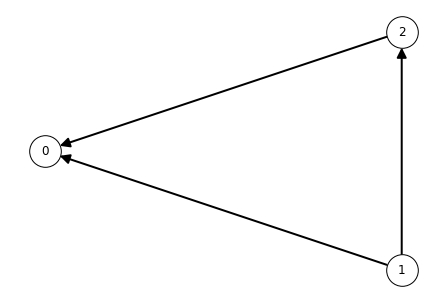

In [42]:
X0 = np.random.normal(0, 1, SAMPLE_SIZE)
X2 = np.random.normal(0, 1, SAMPLE_SIZE)
X1 = X0 + X2 + np.random.normal(0, 1, SAMPLE_SIZE)
gdata = np.array([X0, X1, X2]).T
gdata = scale(gdata)

gdata[:, 0] *= 2

nt_pred = nt.notears_linear(gdata, 0.05, 'l2')
nt_pred_nx = nx.convert_matrix.from_numpy_array(nt_pred, create_using=nx.DiGraph)
nx.draw_shell(nt_pred_nx, with_labels=True, node_size=NODE_SIZE, node_color='white', width=2, arrowsize=ARROW_SIZE, linewidths=LINEWIDTH, edgecolors='black')